# brest cancer 

In [3]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import pickle                                  #one type of file format
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import mglearn

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [11]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names )
df['target'] = cancer.target

In [12]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

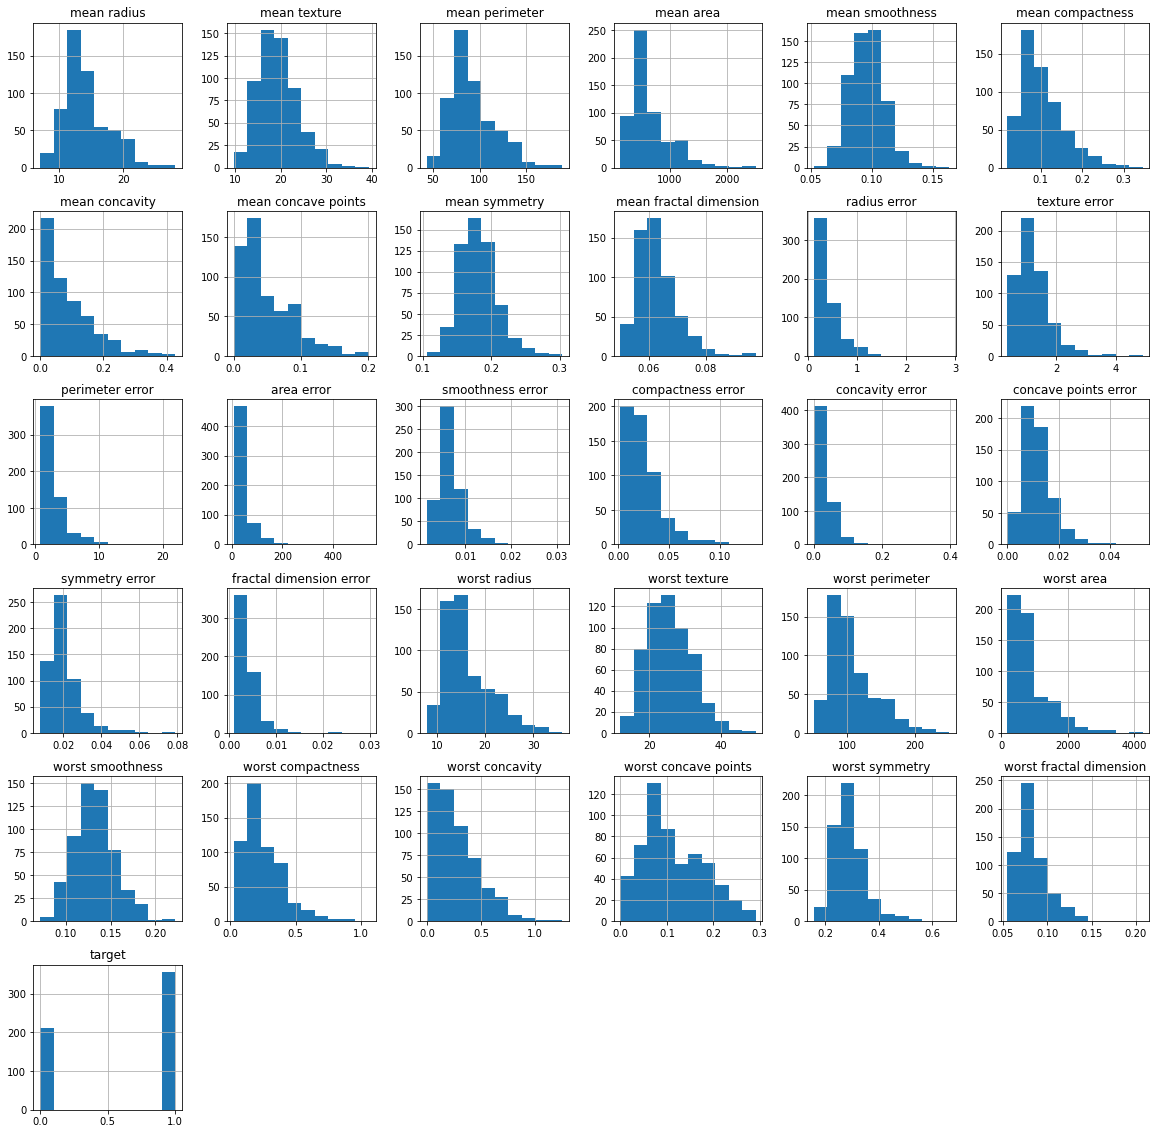

In [19]:
df.hist(figsize= (20,20))
plt.show()

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [26]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [27]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [42]:
X= df.drop('target', axis = 1)
y = df['target']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test  = train_test_split(X,y, test_size=0.15, random_state= 42)

In [36]:
y_train.target.value_counts()

1    286
0    169
Name: target, dtype: int64

In [37]:
y_test.target.value_counts()

1    71
0    43
Name: target, dtype: int64

In [47]:
print(X_train.shape)
print(X_test.shape)

(483, 30)
(86, 30)


In [30]:
#model building

In [50]:
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(random_state=42)
sg.fit(X_train, y_train)
sg.score(X_train,y_train)

0.8861283643892339

In [57]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sg, X_train, y_train, cv=4, scoring='accuracy')
print(np.mean((scores)))
print(np.std((scores)))
scores

0.8944042699724518
0.009065487323500019


array([0.90909091, 0.88429752, 0.89256198, 0.89166667])

In [64]:
#predction
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sg, X_train,y_train, cv=4)


#confusionmtrx
from sklearn.metrics import confusion_matrix
cmfx = confusion_matrix(y_train, y_train_pred)
print(sg.classes_)
print(cancer.target_names)
cmfx

[0 1]
['malignant' 'benign']


array([[150,  30],
       [ 21, 282]], dtype=int64)

In [67]:
from sklearn import metrics
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       180
           1       0.90      0.93      0.92       303

    accuracy                           0.89       483
   macro avg       0.89      0.88      0.89       483
weighted avg       0.89      0.89      0.89       483



In [70]:
#threshold manupulation
y_scores = cross_val_predict(sg, X_train,y_train, cv=4, method= "decision_function")

In [71]:
#precision_recall_curve
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, y_scores)

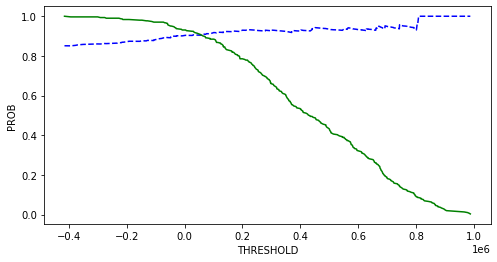

In [78]:
#graph
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel('THRESHOLD')
 plt.ylabel('PROB')            

plt.figure(figsize=(8, 4)) 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0, 0.5, 'precisions')

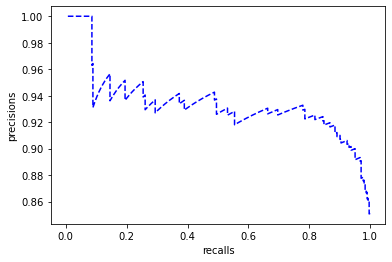

In [79]:
#another way
plt.plot(recalls ,precisions, "b--", label="Precision")
plt.xlabel('recalls')
plt.ylabel('precisions')

In [85]:
#threshod for 95%precision

In [86]:
from sklearn import metrics

threshold_90_precision = thresholds[np.argmax(precisions >= 0.95)] 
y_scoress = cross_val_predict(sg, X_train, y_train, cv=3, method="decision_function")


y_train_pred_90 = (y_scoress >= threshold_90_precision)

print(metrics.classification_report(y_train, y_train_pred_90))

              precision    recall  f1-score   support

           0       0.54      0.92      0.68       180
           1       0.92      0.52      0.67       303

    accuracy                           0.67       483
   macro avg       0.73      0.72      0.67       483
weighted avg       0.78      0.67      0.67       483



In [87]:
#The ROC Curve

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_scoress)

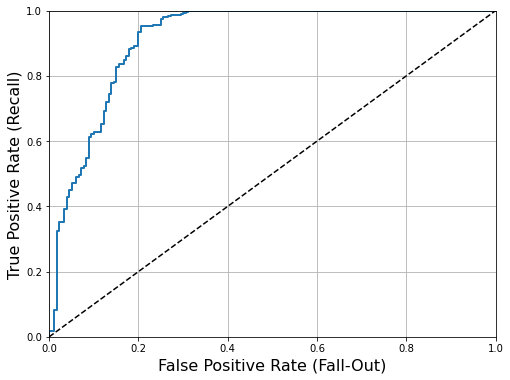

In [92]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
plt.show()

In [93]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scoress)

0.9144297763109644

In [94]:
#suppose want to change the the pricisin recall values
#recall = 0.626

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scoress)


threshold_62_recall = thresholds[np.argmax(tpr >= 0.626)] 
y_scoress = cross_val_predict(sg, X_train, y_train, cv=3, method="decision_function")


y_train_pred_62 = (y_scoress >= threshold_62_recall)


print(metrics.classification_report(y_train, y_train_pred_62))

              precision    recall  f1-score   support

           0       0.59      0.90      0.71       180
           1       0.91      0.63      0.74       303

    accuracy                           0.73       483
   macro avg       0.75      0.76      0.73       483
weighted avg       0.79      0.73      0.73       483



In [100]:
#logistic regresssion
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
y_probas_logist = cross_val_predict(lg, X_train, y_train, cv=3,
 method="predict_proba")

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [105]:
y_scores_logstic = y_probas_logist[:,1]

In [107]:
#roc curve
fpr_logistc, tpr_logistc, thresholds_logistc = metrics.roc_curve(y_train, y_scores_logstic)

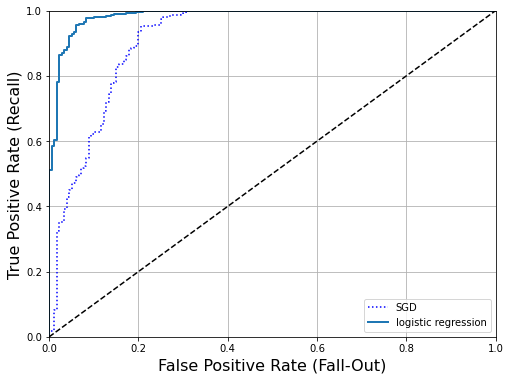

In [112]:
#roc graph
#comparision of sgd and randomforest
plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_logistc, tpr_logistc, "logistic regression")
plt.legend(loc="lower right")
plt.show()

In [123]:
from sklearn.metrics import roc_auc_score
LOGauc = roc_auc_score(y_train, y_scores_logstic)
LOGauc

0.985038503850385

In [114]:
#randomforest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rf, X_train, y_train, cv=3,
 method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train ,y_scores_forest)

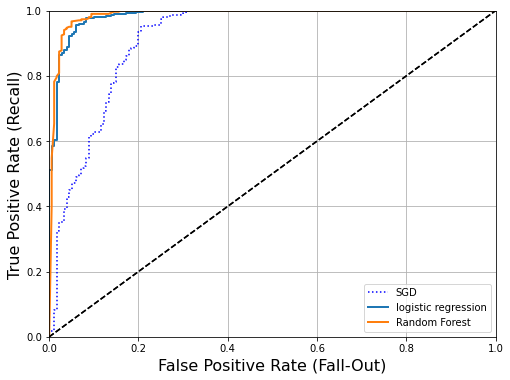

In [116]:
#roc graph
#comparision of sgd and randomforest
plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_logistc, tpr_logistc, "logistic regression")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [156]:
from sklearn.metrics import roc_auc_score
RFauc  =  roc_auc_score(y_train, y_scores_forest)
RFauc

0.9873670700403374

In [124]:
RFauc >LOGauc

True

In [146]:
#knn

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
y_probas_forest = cross_val_predict(rf, X_train, y_train, cv=3,
 method="predict_proba")

y_scores_knn = y_probas_forest[:, 1] # score = proba of positive class

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train ,y_scores_knn)

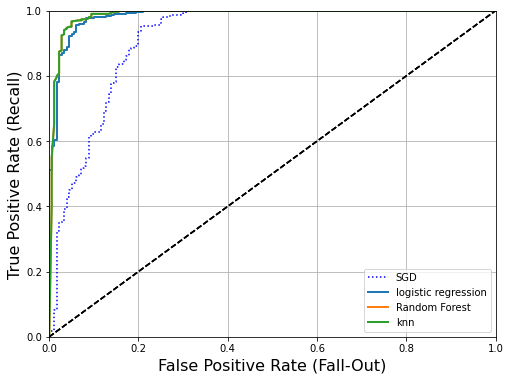

In [147]:
#roc graph
#comparision of sgd and randomforest
plt.figure(figsize=(8, 6)) 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_logistc, tpr_logistc, "logistic regression")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_knn, tpr_knn, "knn")
plt.legend(loc="lower right")
plt.show()

In [157]:
KNNauc  =  roc_auc_score(y_train, y_scores_knn)
KNNauc

0.9873670700403374

In [158]:
KNNauc == RFauc >LOGauc

True

In [125]:
#NOW WE HAVE SELECTED RANDOMFOREST
#NOW DO GRID SEARCH FOR BEST PARAMETER

In [126]:
rf = RandomForestClassifier()

In [137]:
from sklearn.model_selection import GridSearchCV
param_grid =  {'n_estimators':[3,5,10,15],'max_depth':[3,6,10],'ccp_alpha':[0.0,0.001,0.01, 0.1, 0.2, 1,10] }

rf = RandomForestClassifier(random_state=42)
grid_search =  GridSearchCV(rf, param_grid=param_grid,
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 0.2, 1, 10],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [3, 5, 10, 15]},
             return_train_score=True)

In [139]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.01, max_depth=6, n_estimators=5,
                       random_state=42)

In [140]:
grid_search.best_params_

{'ccp_alpha': 0.01, 'max_depth': 6, 'n_estimators': 5}

In [142]:
#final test prediction

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

print(metrics.classification_report(y_test,final_predictions))
print(roc_auc_score(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.95      0.98      0.96        54

    accuracy                           0.95        86
   macro avg       0.96      0.94      0.95        86
weighted avg       0.95      0.95      0.95        86

0.9438657407407407


In [159]:
#knn grid search

from sklearn.model_selection import GridSearchCV
param_grid =  {'n_neighbors':[5,7,10,15] ,'weights' : ['uniform', 'distance'],
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

clf = KNeighborsClassifier()
grid_search =  GridSearchCV(clf, param_grid=param_grid,
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [163]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [164]:
#final test prediction

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

print(metrics.classification_report(y_test,final_predictions))
print(roc_auc_score(y_test, final_predictions))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.91      0.98      0.95        54

    accuracy                           0.93        86
   macro avg       0.94      0.91      0.92        86
weighted avg       0.93      0.93      0.93        86

0.9126157407407407
